In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
post = np.load("/mnt/beegfs/scratch/data/posteriors/postCube_4_0.npy")
Ar = np.load("/mnt/beegfs/scratch/data/posteriors/margpostAr_4_0.npy", allow_pickle=True)
FeH = np.load("/mnt/beegfs/scratch/data/posteriors/margpostFeH_4_0.npy", allow_pickle=True)
Mr = np.load("/mnt/beegfs/scratch/data/posteriors/margpostMr_4_0.npy", allow_pickle=True)
FeH.item()[0].shape, Mr.item()[0].shape, Ar.item()[0].shape, post.shape

((3957, 25), (3957, 155), (3957, 126), (3957, 25, 155, 126))

In [30]:
np.mean(post > 0, axis=(1,2,3)).max()

np.float64(0.6614091141833077)

In [35]:
np.mean(post > np.max(post, axis=(1,2,3))[:,None,None,None] * np.finfo(np.float32).resolution, axis=(1,2,3)).max()

np.float64(0.21953097798259089)

In [36]:
np.mean(post > np.max(post, axis=(1,2,3))[:,None,None,None] * np.finfo(np.float32).resolution, axis=(1,2,3)).argmax()

np.int64(687)

/tmp/ipykernel_1224201/4117977058.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(single_post))


Text(0, 0.5, 'Mr grid index')

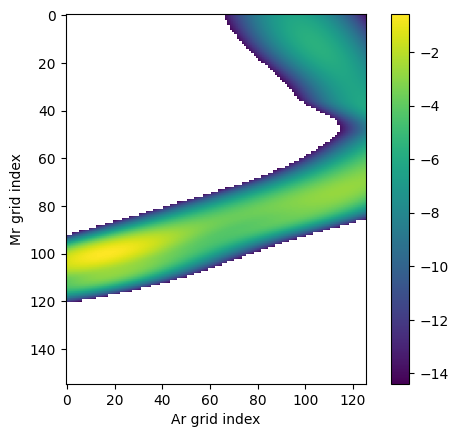

In [77]:
single_post = post[687].sum(axis=0)
single_post = np.where(single_post > 1e-6 * single_post.max(), single_post, 0)
plt.imshow(np.log(single_post), origin='upper')
plt.colorbar()
plt.xlabel('Ar grid index')
plt.ylabel('Mr grid index')

In [81]:
qs = np.quantile(post[post > 0], [0.001, 0.01, 0.5, 0.99, 0.999], axis=(1,2,3))

In [ ]:
# clipped_post = np.max(post, axis=(1,2,3))[:,None,None,None] * np.finfo(np.float32).resolution, axis=(1,2,3)